In [122]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [141]:
excelDoc = pd.read_excel("Dummy Data.xlsx", sheet_name = ["USE THIS"])
data = excelDoc["USE THIS"]
data.set_index("Client", inplace = True)
data

,"Existing Client? (1) yes, (0) no",Value of Estate,Number of Beneficiaries,"Multiple national jurisdictions? (1) yes, (0) no",Testementary Trust (1) or Regular Will (0),"Claims expected against estate? (1) yes, (0) no",Cost
Client,,,,,,,
1,1,500000,5,0,0,0,70005.20
2,1,200000,2,0,0,0,15001.80
3,1,1000000,7,0,0,0,105007.70
4,1,600000,6,0,1,1,93006.90
5,1,450000,13,0,0,0,49013.26
6,1,10000000,3,1,0,1,1325002.25
7,1,1437000,4,0,1,1,216183.00
8,1,5509000,11,1,1,1,751181.22
9,1,8863000,4,1,1,1,921303.12


In [124]:
# Convert the will type to a category
mask1 = data["Testementary Trust (1) or Regular Will (0)"] == 1
data.loc[mask1, "Testementary Trust (1) or Regular Will (0)"] = "Testementary Trust"

mask2 = data["Testementary Trust (1) or Regular Will (0)"] == 0
data.loc[mask2, "Testementary Trust (1) or Regular Will (0)"] = "Regular Will"

data["Testementary Trust (1) or Regular Will (0)"] = data["Testementary Trust (1) or Regular Will (0)"].astype("category")

data

,"Existing Client? (1) yes, (0) no",Value of Estate,Number of Beneficiaries,"Multiple national jurisdictions? (1) yes, (0) no",Testementary Trust (1) or Regular Will (0),"Claims expected against estate? (1) yes, (0) no",Cost
Client,,,,,,,
1,1,500000,5,0,Regular Will,0,70005.20
2,1,200000,2,0,Regular Will,0,15001.80
3,1,1000000,7,0,Regular Will,0,105007.70
4,1,600000,6,0,Testementary Trust,1,93006.90
5,1,450000,13,0,Regular Will,0,49013.26
6,1,10000000,3,1,Regular Will,1,1325002.25
7,1,1437000,4,0,Testementary Trust,1,216183.00
8,1,5509000,11,1,Testementary Trust,1,751181.22
9,1,8863000,4,1,Testementary Trust,1,921303.12


In [125]:
# Convert the existing client column to booleans
mask1 = data["Existing Client? (1) yes, (0) no"] == 1
data.loc[mask1, "Existing Client? (1) yes, (0) no"] = True

mask1 = data["Existing Client? (1) yes, (0) no"] == 0
data.loc[mask1, "Existing Client? (1) yes, (0) no"] = False

data

,"Existing Client? (1) yes, (0) no",Value of Estate,Number of Beneficiaries,"Multiple national jurisdictions? (1) yes, (0) no",Testementary Trust (1) or Regular Will (0),"Claims expected against estate? (1) yes, (0) no",Cost
Client,,,,,,,
1,True,500000,5,0,Regular Will,0,70005.20
2,True,200000,2,0,Regular Will,0,15001.80
3,True,1000000,7,0,Regular Will,0,105007.70
4,True,600000,6,0,Testementary Trust,1,93006.90
5,True,450000,13,0,Regular Will,0,49013.26
6,True,10000000,3,1,Regular Will,1,1325002.25
7,True,1437000,4,0,Testementary Trust,1,216183.00
8,True,5509000,11,1,Testementary Trust,1,751181.22
9,True,8863000,4,1,Testementary Trust,1,921303.12


# SKLearn regression calculation

In [126]:
excelDoc = pd.read_excel("Dummy Data.xlsx", sheet_name = ["USE THIS"])
data = excelDoc["USE THIS"]
data.set_index("Client", inplace = True)

In [127]:
# Set up the independent variables

independentVars = data.loc[:, data.columns != 'Cost']
independentVars

,"Existing Client? (1) yes, (0) no",Value of Estate,Number of Beneficiaries,"Multiple national jurisdictions? (1) yes, (0) no",Testementary Trust (1) or Regular Will (0),"Claims expected against estate? (1) yes, (0) no"
Client,,,,,,
1,1,500000,5,0,0,0
2,1,200000,2,0,0,0
3,1,1000000,7,0,0,0
4,1,600000,6,0,1,1
5,1,450000,13,0,0,0
6,1,10000000,3,1,0,1
7,1,1437000,4,0,1,1
8,1,5509000,11,1,1,1
9,1,8863000,4,1,1,1


In [128]:
# Set up the dependent variable

dependentVar = data["Cost"]

In [129]:
# Fit a model
lm = linear_model.LinearRegression()
model = lm.fit(independentVars, dependentVar)

In [130]:
predictions = lm.predict(independentVars)
print(predictions[0:5])

[ 47661.20295215  -7230.24983119 121584.14756786  84683.25870812
  88273.92255395]


In [131]:
# Find the R^2 score of the model
lm.score(independentVars, dependentVar)

0.93686173089643

In [132]:
# Output the coefficients of the model
lm.coef_

array([-2.39386580e+04,  1.24428809e-01,  5.85427001e+03,  3.38831820e+04,
        1.07696071e+04,  7.95529776e+03])

In [133]:
# Output the intercept of the model
lm.intercept_

-19885.89369305002

# Comparing the model to the data

In [144]:
def fullmodel(case):
    estimate = 0
    for i in range(len(lm.coef_)):
        estimate = estimate + case[i] * lm.coef_[i]
    
    return estimate

# client, estate, beneficiaries, juristictions, caseType, claims
case = [1, 500000, 0, 0, 0, 0]
fullmodel(case)

case = [1, 200000, 2, 0, 0, 0]
fullmodel(case)

12655.643861857125

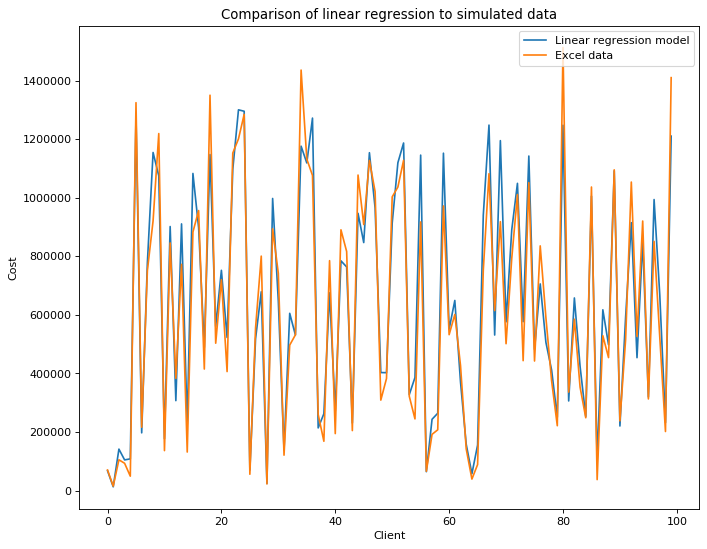

In [184]:
# Calculate the model's estimate for each client
estimates = [None] * int(data["Cost"].count())

data.iloc[1].to_list()

for i in range(data["Cost"].count()):
    estimates[i] = fullmodel(data.iloc[i].to_list())
    
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(estimates, label = "Linear regression model")
plt.plot(data["Cost"].values, label = "Excel data")
plt.title('Comparison of linear regression to simulated data')
plt.xlabel("Client")
plt.ylabel("Cost")
plt.legend(loc = 'upper right')

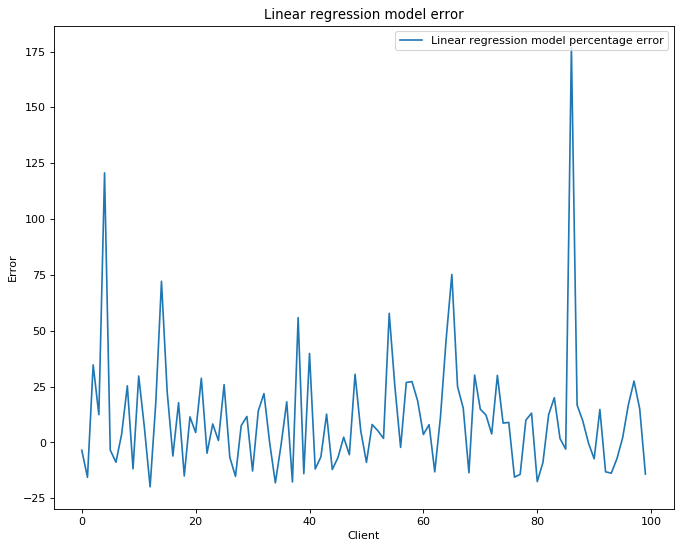

In [187]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(100*(estimates-data["Cost"].values)/data["Cost"].values, label = "Linear regression model percentage error")
plt.title('Linear regression model error')
plt.xlabel("Client")
plt.ylabel("Error")
plt.legend(loc = 'upper right')

In [194]:
print("The average percentage error is", (100*(estimates-data["Cost"].values)/data["Cost"].values).mean())

The average percentage error is 10.92018451738268


# statsmodel regression calculation

In [135]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import datasets

In [136]:
independentVars = data.loc[:, data.columns != 'Cost']
dependentVar = data["Cost"]

model = sm.OLS(dependentVar, independentVars).fit()
predictions = model.predict(independentVars)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Cost   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              831.6
Date:                Sat, 05 Oct 2019   Prob (F-statistic):                    4.00e-79
Time:                        21:11:45   Log-Likelihood:                         -1293.7
No. Observations:                 100   AIC:                                      2599.
Df Residuals:                      94   BIC:                                      2615.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Existing Client? (1) yes, (0) no                 -2.815e+04   1.97e+04     -1.425      0.157   -6.74e+04    1.11e+04
Value of Estate                                      0.1232      0.003     35.961      0.000       0.116       0.130
Number of Beneficiaries                           4941.8719   1979.997      2.496      0.014    1010.542    8873.202
Multiple national jurisdictions? (1) yes, (0) no  3.545e+04   2.95e+04      1.201      0.233   -2.31e+04    9.41e+04
Testementary Trust (1) or Regular Will (0)        7943.2493   2.08e+04      0.381      0.704   -3.34e+04    4.93e+04
Claims expected against estate? (1) yes, (0) no   3890.7467   1.99e+04      0.195      0.846   -3.57e+04    4.35e+04
==============================================================================
Omnibus:                        4.383   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.810
Skew:                           0.361   Prob(JB):                        0.149
Kurtosis:                       3.627   Cond. No.                     1.62e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""